In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [25]:
tf.__version__


'2.10.1'

In [26]:
np.__version__


'1.23.5'

In [28]:
matplotlib.__version__

'3.9.4'

In [29]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')

In [30]:
print("Num GPUs Available: ",len(physical_devices))

Num GPUs Available:  0


In [31]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Example training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


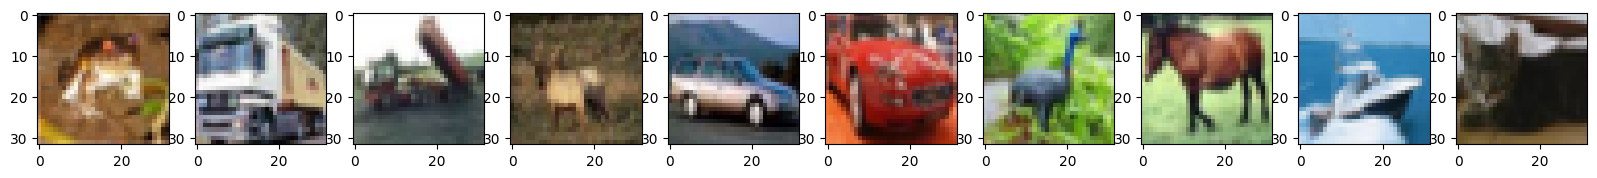

In [36]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
                  'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:10]]))
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1,10)
fig.set_size_inches(20,6)

for i in range(10):
    image = x_train[i]
    axarr[i].imshow(image)
plt.show()

In [37]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [38]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [39]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [43]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3))) #Input layer
ann.add(Dense(2048,activation='relu')) #Hidden layer
ann.add(Dense(10,activation='softmax')) #Output layer

In [42]:
ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [45]:
ann.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
history = ann.fit(x_train, y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 66s 41ms/step - loss: 1.9123 - accuracy: 0.3330 - val_loss: 1.7319 - val_accuracy: 0.3785
Epoch 2/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.6830 - accuracy: 0.3974 - val_loss: 1.6256 - val_accuracy: 0.4263
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 1.6160 - accuracy: 0.4263 - val_loss: 1.5548 - val_accuracy: 0.4519
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5622 - accuracy: 0.4444 - val_loss: 1.5771 - val_accuracy: 0.4403
Epoch 5/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5354 - accuracy: 0.4564 - val_loss: 1.5416 - val_accuracy: 0.4499
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.5109 - accuracy: 0.4632 - val_loss: 1.5569 - val_accuracy: 0.4506
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4882 - accuracy: 0.4706 - val_loss: 1.5236 -

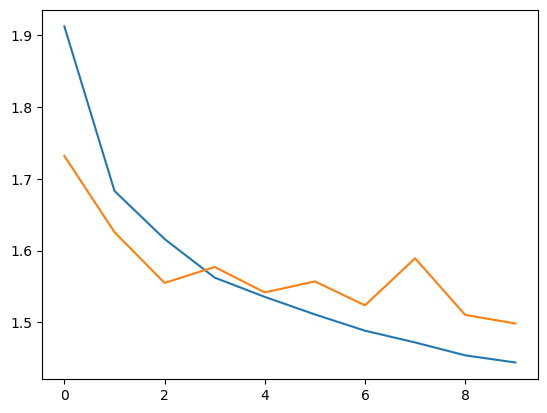

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [51]:
#CNN Model
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [56]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape = (32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64,activation='relu')) #hidden layer
cnn.add(Dropout(0.3))
cnn.add(Dense(10,activation='softmax')) #Output layer

In [57]:
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 128)       

In [58]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = cnn.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5912 - accuracy: 0.4122 - val_loss: 1.1918 - val_accuracy: 0.5696
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1264 - accuracy: 0.6034 - val_loss: 0.9248 - val_accuracy: 0.6792
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9144 - accuracy: 0.6847 - val_loss: 0.8417 - val_accuracy: 0.7022
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7834 - accuracy: 0.7319 - val_loss: 0.7959 - val_accuracy: 0.7305
Epoch 5/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6844 - accuracy: 0.7663 - val_loss: 0.8030 - val_accuracy: 0.7341
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.6004 - accuracy: 0.7933 - val_loss: 0.7783 - val_accuracy: 0.7375
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.5233 - accuracy: 0.8191 - val_loss: 0.7802 -

In [59]:
def plotlosses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

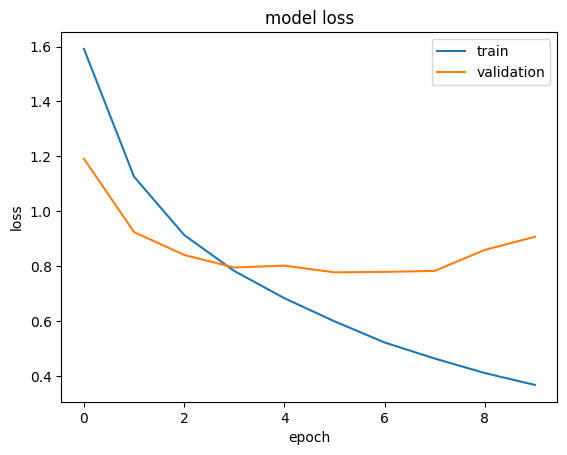

In [61]:
plotlosses(history)

In [62]:
def plotAccuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

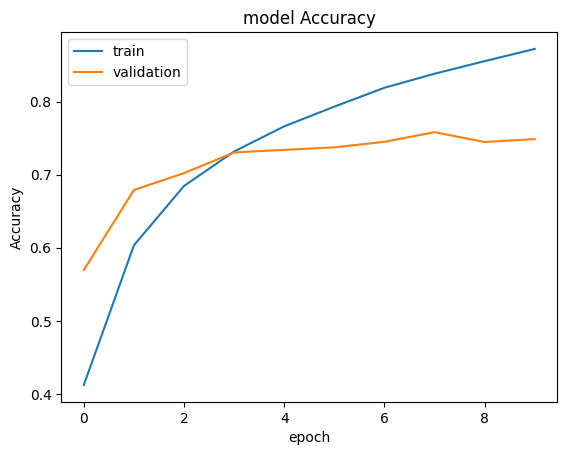

In [63]:
plotAccuracy(history)

In [64]:
score = cnn.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9076 - accuracy: 0.7488


In [65]:
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[0.9075874090194702, 0.7487999796867371]


In [68]:
from keras.models import load_model
cnn.save('cnn_model.h5')

In [ ]:
# Load the model
model = tf.keras.models.load_model('cnn_model.h5')

In [ ]:
import numpy as np
# Add a batch dimension to the input
x_test_sample = np.expand_dims(x_test[20], axis=0)

# Now pass it to the model for prediction
model.predict(x_test_sample)

In [ ]:
plt.imshow(x_test[20])

In [ ]:
# Example: if you have class names like this
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']  # replace with your actual class names

# Get the prediction probabilities
predictions = model.predict(x_test_sample)

# Get the index of the class with the highest probability
predicted_class_index = np.argmax(predictions)

# Get the corresponding class name
predicted_class_name = class_names[predicted_class_index]

print(f"The predicted class is: {predicted_class_name}")